### Answers for Assignment 8 - Time Series and Group Operations

Complete the tasks below. Please turn in a single Jupyter notebook named `8_first_last.ipynb` (substitute your first and last name). Please run Kernel > Restart & Run All on your notebook before turning in.

#### Precipitation in La Jolla

For this assignment, we will use a file containing daily precipitation data in La Jolla from February 2009 to February 2018, which were downloaded from [NOAA](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:US1CASD0030/detail) using "standard" (imperial) units (inches for precipitation, feet for elevation). Download the file from [GitHub](https://github.com/cuttlefishh/python-for-data-analysis/blob/master/data/la_jolla_precip_daily.csv).

**1.** Set up the file.

* Import the csv file as a Pandas DataFrame with default header and index.
* Change the 'DATE' column to a timestamps using `pd.datetime()`.
* What was the maximum daily precipitation (in inches) during this time period and when was it?

**2.** Explore the dataset.

* We don't need the columns 'SNOW' and 'SNOW_ATTRIBUTES' because there was no recorded snow in the dataset. Delete those columns "in place".
* Find out about the sampling stations. Notice that the column values are similar between rows except 'DATE' and 'PRCP'. Explore these other columns using three different commands (we haven't covered them yet, but they are easy to use and you can always google them): 
    * Use the `value_counts()` method for each of these columns: 'STATION', 'NAME', 'LATITUDE', 'LONGITUDE', and 'ELEVATION'. There should only be one cateogory for each calculation because all the data come from the same station. To see what output looks like for a more diverse series, use the `value_counts()` method on 'PRCP' and 'PRCP_ATTRIBUTES'.
    * Make a DataFrame with just the columns 'STATION', 'NAME', 'LATITUDE', 'LONGITUDE', and 'ELEVATION' and use the method `drop_duplicates()` to see all the unique combinations of values in those five columns. 
    * Create a groupby object using `groupby('STATION')`, then use the `count()` method on that groupby object to count the number of values for each station.

**3.** Plot precipitation versus time.

* Use the Matplotlib function `plot()` to plot 'PRCP' versus 'DATE' as a line.
* Plot 'PRCP' versus 'DATE' each year separately as a different colored line, with a legend indicating the year. Hint: You will have to extract the year from the date somehow, for example with the `.year` attribute or a regular expression. You might find it easiest to add new columns for year and day of year.
* Go back and recolor the two plots above: pick two colors from ColorBrewer or xkcd and draw your subplots again.
* Replot the plots in a subplot with the two sets of axes in a 1x2 formation.

**4.** Plot distributions of the precipitation data.

* Plot a histogram of precipitation values using the Matplotlib function `hist()`.
* Plot a histogram with kernel density and rugplot with the Seaborn function `distplot()`. Play around with the settings to make a histogram that represents the data well.
* Add columns to the DataFrame for year and month. Hint: You can do this with list comprehension and the datetime attributes `year` and `month`.
* Use groupby to group the data by year or by month. Which year was the rainiest? Which month was the rainiest?
* Make boxplots by year and by month using the Seaborn function `boxplot()`. Hint: If you make a boxplot of your DataFrame without grouping, the boxplots will be centered on zero, because there are so many days with zero precipitation. Instead, use groupby to group the data by year *and* month (use a list containing these columns), set `as_index=False`, average over those groups, and save this as a new DataFrame; then use this for your boxplots.

**5.** Pivoting, stacking and unstacking.

* Use pivot_table to produce a new DataFrame, where rows=years and columns=months, containing the mean precipitation of each month.
* Draw a heatmap of years x months where each square is a month colored by mean precipitation. Adjust the colormap to highlight months with heavy precipitation. Hint: Seaborn's `heatmap()` function makes this very easy.
* Stack the monthly precipitation table using `stack()`. View the values for 2017. Which month had the most precipitation in 2017? Describe the distribution statistics for all months using `describe()`. How many months are included in this dataset? What was the median month (daily average) value in this time period?
* Use `unstack()` to stack precipitation pivot table by month and then year. View the values for December. Which year had the wettest December?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set(context='notebook', style='whitegrid', palette=sns.color_palette('Paired', 12))

#### Question 1 - Set up the file

Import the csv file as a Pandas DataFrame with default header and index.

In [3]:
# By default, the index will start with zero and the header will be the first row of the csv file.
df = pd.read_csv('../../data/la_jolla_precip_daily.csv')

In [4]:
# It's always good to take a quick look at your DataFrame.
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES
0,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-18,0.0,",,N",0.0,",,N"
1,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-19,0.0,",,N",0.0,",,N"
2,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-20,0.0,",,N",0.0,",,N"
3,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-21,0.0,",,N",0.0,",,N"
4,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-22,0.0,",,N",0.0,",,N"


Change the 'DATE' column to a timestamps using `pd.datetime()`.

In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])

What was the maximum daily precipitation (in inches) during this time period and when was it?

In [6]:
df['PRCP'].max()

3.3500000000000001

<span style='color:red'>The maximum rainfall over this period was 3.35 inches.</span>

In [7]:
# One way to get information about the maximum precipitation date.
df[df['PRCP'] == df['PRCP'].max()]

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES
663,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2010-12-22,3.35,",,N",NaN,NaN


In [8]:
# Another way to get information about the max precipitation value.
df.loc[df['PRCP'].idxmax()]

STATION                       US1CASD0030
NAME               LA JOLLA 2.1 SE, CA US
LATITUDE                          32.8257
LONGITUDE                         -117.25
ELEVATION                           149.7
DATE                  2010-12-22 00:00:00
PRCP                                 3.35
PRCP_ATTRIBUTES                       ,,N
SNOW                                  NaN
SNOW_ATTRIBUTES                       NaN
Name: 663, dtype: object

<span style='color:red'>The max precipitation occurred on Dec 22, 2010.</span>

#### Question 2 - Explore the dataset

We don't need the columns 'SNOW' and 'SNOW_ATTRIBUTES' because there was no recorded snow in the dataset. Delete those columns "in place".

In [9]:
# Delete these columns because there wasn't any recorded snow.
df.drop(['SNOW', 'SNOW_ATTRIBUTES'], axis=1, inplace=True)

In [10]:
# Check the DataFrame again.
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES
0,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-18,0.0,",,N"
1,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-19,0.0,",,N"
2,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-20,0.0,",,N"
3,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-21,0.0,",,N"
4,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-22,0.0,",,N"


Find out about the sampling stations. Notice that the column values are similar between rows except 'DATE' and 'PRCP'. Explore these other columns using three different commands (we haven't covered them yet, but they are easy to use and you can always google them): 

Use the `value_counts()` method for each of these columns: 'STATION', 'NAME', 'LATITUDE', 'LONGITUDE', and 'ELEVATION'. There should only be one cateogory for each calculation because all the data come from the same station. To see what output looks like for a more diverse series, use the `value_counts()` method on 'PRCP' and 'PRCP_ATTRIBUTES'.

In [11]:
# These columns refer to the stations where data was collected.
columns = ['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION']

In [12]:
# Count the times each value was observed in each column.
for column in columns:
    print(df[column].value_counts(), '\n')

US1CASD0030    3258
Name: STATION, dtype: int64 

LA JOLLA 2.1 SE, CA US    3258
Name: NAME, dtype: int64 

32.8257    3258
Name: LATITUDE, dtype: int64 

-117.2501    3258
Name: LONGITUDE, dtype: int64 

149.7    3258
Name: ELEVATION, dtype: int64 



In [13]:
for column in ['PRCP', 'PRCP_ATTRIBUTES']:
    print(df[column].value_counts(), '\n')

0.00    2778
0.01     107
0.02      67
0.03      35
0.04      23
0.07      20
0.08      14
0.05      14
0.06       9
0.12       8
0.25       8
0.16       7
0.09       7
0.13       7
0.10       6
0.34       6
0.24       5
0.17       5
0.63       5
0.14       5
0.20       4
0.30       4
0.15       4
0.27       4
0.38       4
0.43       3
0.28       3
0.45       3
0.42       3
0.35       3
        ... 
1.35       1
1.50       1
2.00       1
1.26       1
3.35       1
1.23       1
0.48       1
1.34       1
0.55       1
2.02       1
0.83       1
0.46       1
0.87       1
0.40       1
1.37       1
0.84       1
0.51       1
0.58       1
0.36       1
1.55       1
0.81       1
0.93       1
0.64       1
1.10       1
0.54       1
0.67       1
2.45       1
0.47       1
0.26       1
0.23       1
Name: PRCP, Length: 89, dtype: int64 

,,N     3006
T,,N     252
Name: PRCP_ATTRIBUTES, dtype: int64 



<span style='color:red'>The results are pretty boring when all columns have the same values. The last two examples have more variation.</span>

Make a DataFrame with just the columns 'STATION', 'NAME', 'LATITUDE', 'LONGITUDE', and 'ELEVATION' and use the method `drop_duplicates()` to see all the unique combinations of values in those five columns. 

In [14]:
df[columns].drop_duplicates()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION
0,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7


<span style='color:red'>This shows the unique combinations of these five columns. All rows have the same values.</span>

Create a groupby object using `groupby('STATION')`, then use the `count()` method on that groupby object to count the number of values for each station.

In [15]:
grouped_station = df.groupby('STATION')
grouped_station.count()

,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES
STATION,,,,,,,
US1CASD0030,3258,3258,3258,3258,3258,3258,3258


<span style='color:red'>Groupby combined with count gives us information about the number of values in each column for a given value of 'STATION'. Here they are all the same.</span>

#### Question 3 - Plot precipitation versus time

Use the Matplotlib function `plot()` to plot 'PRCP' versus 'DATE' as a line.

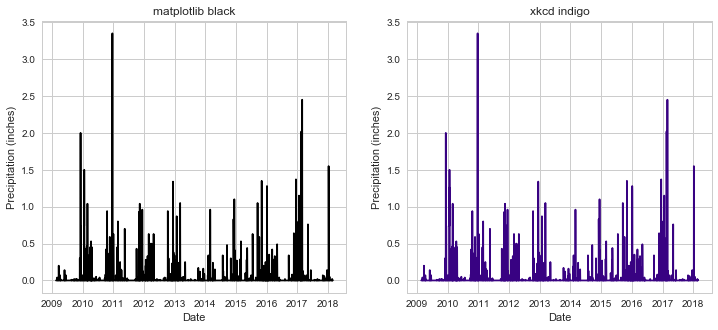

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

title = ['matplotlib black', 'xkcd indigo']
color = ['k', sns.xkcd_rgb['indigo']]

for i in [0, 1]:
    ax[i].plot(df['DATE'], df['PRCP'], color[i])
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Precipitation (inches)')

<span style='color:red'>In response to the later part of the question, we are coloring two different ways, displayed as subplots. We can put everything in a for loop!</span>

Plot 'PRCP' versus 'DATE' each year separately as a different colored line, with a legend indicating the year. Hint: You will have to extract the year from the date somehow, for example with the `.year` attribute or a regular expression. You might find it easiest to add new columns for year and day of year.

In [17]:
# We can add columns for year, month, day, and day of year.
df['YEAR'] = [x.year for x in df.DATE]
df['MONTH'] = [x.month for x in df.DATE]
df['DAY'] = [x.day for x in df.DATE]
df['DAY_OF_YEAR'] = [x.dayofyear for x in df.DATE]

In [18]:
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,YEAR,MONTH,DAY,DAY_OF_YEAR
0,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-18,0.0,",,N",2009,2,18,49
1,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-19,0.0,",,N",2009,2,19,50
2,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-20,0.0,",,N",2009,2,20,51
3,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-21,0.0,",,N",2009,2,21,52
4,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-22,0.0,",,N",2009,2,22,53


<span style='color:red'>We will use 'YEAR' and 'DAY_OF_YEAR' now, but we added 'MONTH' and 'DAY' at the same time for completion. They may come in handy later.</span>

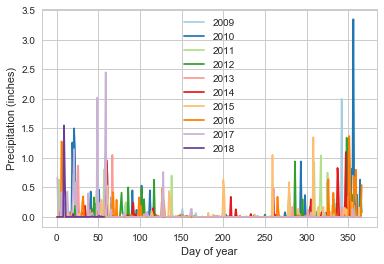

In [19]:
# colormap #1
fig, ax = plt.subplots()
for year in df.YEAR.unique():
    dfx = df[df.YEAR == year]
    ax.plot(dfx.DAY_OF_YEAR, dfx.PRCP, label=year)
ax.set_xlabel('Day of year')
ax.set_ylabel('Precipitation (inches)')
ax.legend()

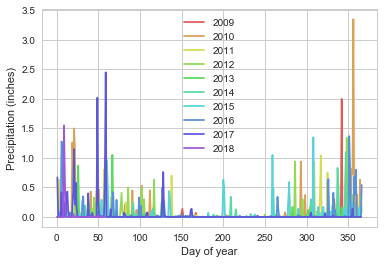

In [20]:
# colormap #2
with sns.color_palette("hls", 12):
    fig, ax = plt.subplots()
    for year in df.YEAR.unique():
        dfx = df[df.YEAR == year]
        ax.plot(dfx.DAY_OF_YEAR, dfx.PRCP, label=year)
    ax.set_xlabel('Day of year')
    ax.set_ylabel('Precipitation (inches)')
    ax.legend()

Go back and recolor the two plots above: pick two colors from ColorBrewer or xkcd and draw your subplots again. Replot the plots in a subplot with the two sets of axes in a 1x2 formation.

<span style='color:red'>For year-by-year lines, first we colored using the 12-color 'Paired' colormap, specified at the start of the notebook. Then we temporarily changed the colormap to the 12-color 'hls' colormap. Note: I couldn't get two different colormaps in the same subplot! I think this is because the colormap is defined with the subplots are created.</span>

#### Question 4 - Plot distributions of the precipitation data

Plot a histogram of precipitation values using the Matplotlib function `hist()`.

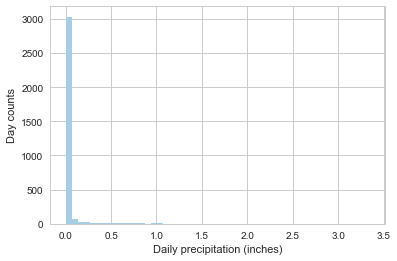

In [21]:
# Matplotlib histogram
fig, ax = plt.subplots()
ax.hist(df['PRCP'], bins=50)
ax.set_xlabel('Daily precipitation (inches)')
ax.set_ylabel('Day counts');

<span style='color:red'>This basic histogram shows that most days have zero precipitation, but not much else.</span>

Plot a histogram with kernel density and rugplot with the Seaborn function `distplot()`. Play around with the settings to make a histogram that represents the data well.

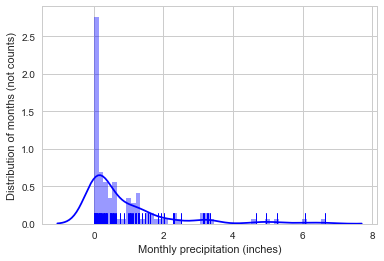

In [22]:
# Seaborn distplot
sns.distplot(df.groupby(['YEAR', 'MONTH']).sum().PRCP, color='b', bins=50, rug=True, kde=True)
plt.xlabel('Monthly precipitation (inches)')
plt.ylabel('Distribution of months (not counts)');

<span style='color:red'>Here we are plotting the sum for each month using groupby and sum. Distplot gives us the histogram plus a kernel density estimate and rugplot.</span>

Add columns to the DataFrame for year and month. Hint: You can do this with list comprehension and the datetime attributes `year` and `month`.

In [23]:
# We added `year` and `month` above. We also added `day` and `dayofyear`.
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,YEAR,MONTH,DAY,DAY_OF_YEAR
0,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-18,0.0,",,N",2009,2,18,49
1,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-19,0.0,",,N",2009,2,19,50
2,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-20,0.0,",,N",2009,2,20,51
3,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-21,0.0,",,N",2009,2,21,52
4,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-22,0.0,",,N",2009,2,22,53


Use groupby to group the data by year or by month. Which year was the rainiest? Which month was the rainiest?

In [24]:
df.groupby(['YEAR'], as_index=False).mean().sort_values('PRCP')

,YEAR,LATITUDE,LONGITUDE,ELEVATION,PRCP,MONTH,DAY,DAY_OF_YEAR
4,2013,32.8257,-117.2501,149.7,0.012755,6.501377,15.688705,182.214876
0,2009,32.8257,-117.2501,149.7,0.013439,7.321656,16.006369,207.334395
5,2014,32.8257,-117.2501,149.7,0.022857,6.510989,15.678571,182.500000
2,2011,32.8257,-117.2501,149.7,0.026022,6.565826,15.647059,184.137255
6,2015,32.8257,-117.2501,149.7,0.027775,6.541209,15.760989,183.500000
3,2012,32.8257,-117.2501,149.7,0.028000,6.477778,15.627778,182.272222
7,2016,32.8257,-117.2501,149.7,0.035656,6.513661,15.756831,183.500000
8,2017,32.8257,-117.2501,149.7,0.037022,6.463483,15.966292,181.331461
9,2018,32.8257,-117.2501,149.7,0.042182,1.436364,15.018182,28.545455
1,2010,32.8257,-117.2501,149.7,0.057214,6.523677,15.841226,183.036212


<span style='color:red'>Answer: The rainiest year was 2010.</span> 

In [25]:
df.groupby(['MONTH'], as_index=False).mean().sort_values('PRCP')

,MONTH,LATITUDE,LONGITUDE,ELEVATION,PRCP,YEAR,DAY,DAY_OF_YEAR
7,8,32.8257,-117.2501,149.7,0.001326,2013.000000,16.000000,228.222222
5,6,32.8257,-117.2501,149.7,0.002622,2013.044944,15.438202,166.662921
6,7,32.8257,-117.2501,149.7,0.006774,2013.000000,16.000000,197.222222
8,9,32.8257,-117.2501,149.7,0.008863,2012.921569,16.007843,259.243137
4,5,32.8257,-117.2501,149.7,0.017870,2013.014440,15.902527,136.126354
3,4,32.8257,-117.2501,149.7,0.020333,2013.000000,15.500000,105.722222
9,10,32.8257,-117.2501,149.7,0.021362,2013.000000,16.000000,289.222222
2,3,32.8257,-117.2501,149.7,0.029495,2013.014440,15.960289,75.184116
10,11,32.8257,-117.2501,149.7,0.033507,2013.000000,15.455224,319.679104
1,2,32.8257,-117.2501,149.7,0.054588,2013.792157,14.894118,45.894118


<span style='color:red'>Answer: The rainiest month was December.</span> 

Make boxplots by year and by month using the Seaborn function `boxplot()`. Hint: If you make a boxplot of your DataFrame without grouping, the boxplots will be centered on zero, because there are so many days with zero precipitation. Instead, use groupby to group the data by year *and* month (use a list containing these columns), set `as_index=False`, average over those groups, and save this as a new DataFrame; then use this for your boxplots.

In [26]:
df_mean_by_month = df.groupby(['YEAR', 'MONTH'], as_index=False).mean()

Text(0,0.5,'Precipitation (mm)')

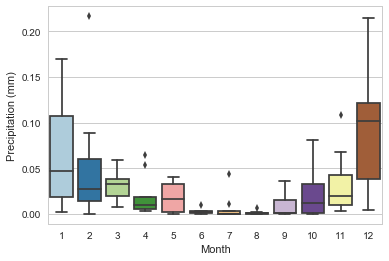

In [27]:
# Boxplot by month.
sns.boxplot(x='MONTH', y='PRCP', data=df_mean_by_month)
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')

<span style='color:red'>The distribution shows December was the wettest month (daily mean) overall. But it appears the wettest single month was in Feburary.</span>

Text(0,0.5,'Precipitation (mm)')

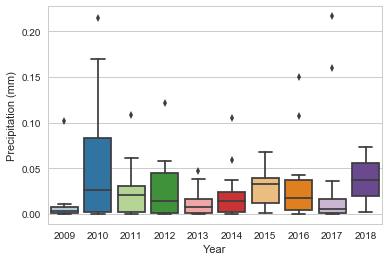

In [28]:
# Boxplot by year.
sns.boxplot(x='YEAR', y='PRCP', data=df_mean_by_month)
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')

<span style='color:red'>The distribution shows 2010, 2015, and 2018 had the higest median month precipitation (daily mean). However, 2018 has only January and February, which are wet months! Based on the outliers, 2010, 2016, and 2017 had the wettest months.</span>

In [29]:
df_mean_by_month.sort_values('PRCP', ascending=False).head()

,YEAR,MONTH,LATITUDE,LONGITUDE,ELEVATION,PRCP,DAY,DAY_OF_YEAR
96,2017,2,32.8257,-117.2501,149.7,0.216429,14.5,45.5
22,2010,12,32.8257,-117.2501,149.7,0.214516,16.0,350.0
11,2010,1,32.8257,-117.2501,149.7,0.169677,16.0,16.0
95,2017,1,32.8257,-117.2501,149.7,0.160000,16.0,16.0
94,2016,12,32.8257,-117.2501,149.7,0.150000,16.0,351.0


<span style='color:red'>Sorting our new DataFrame by precipitation and viewing the top few rows, we can see that the wettest two months were February 2017 and December 2010.</span>

#### Question 5 - Pivoting, stacking and unstacking

Use pivot_table to produce a new DataFrame, where rows=years and columns=months, containing the mean precipitation of each month.

In [30]:
# Using pivot_table to get the mean of each month in a table where rows=years and columns=months
precip = df.pivot_table(index='YEAR', columns='MONTH', values='PRCP', aggfunc='mean')
precip

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
2009,NaN,0.000000,0.007742,0.003000,0.006774,0.003704,0.000000,0.000323,0.001333,0.001290,0.011333,0.101613
2010,0.169677,0.088462,0.020000,0.064333,0.001935,0.002667,0.003548,0.000000,0.001923,0.080968,0.032333,0.214516
2011,0.027742,0.061538,0.022414,0.010000,0.025517,0.003000,0.000000,0.000000,0.001429,0.018065,0.108000,0.039032
2012,0.018065,0.057778,0.041613,0.053333,0.000645,0.001667,0.000323,0.001613,0.001333,0.042258,0.010000,0.121852
2013,0.047419,0.017143,0.038065,0.006000,0.016452,0.000333,0.001290,0.000323,0.000000,0.011613,0.002857,0.010000
2014,0.002258,0.037500,0.059032,0.018000,0.000000,0.000000,0.011290,0.006452,0.018000,0.000000,0.019333,0.105333
2015,0.016667,0.013571,0.032903,0.005333,0.040645,0.002000,0.044194,0.001290,0.035667,0.033226,0.067333,0.038710
2016,0.107419,0.015517,0.035161,0.018333,0.033226,0.000667,0.000000,0.000968,0.015667,0.004839,0.042667,0.150000
2017,0.160000,0.216429,0.008065,0.004667,0.036129,0.009667,0.000323,0.000968,0.000476,0.000000,0.005667,0.004516


Draw a heatmap of years x months where each square is a month colored by mean precipitation. Adjust the colormap to highlight months with heavy precipitation. Hint: Seaborn's `heatmap()` function makes this very easy.

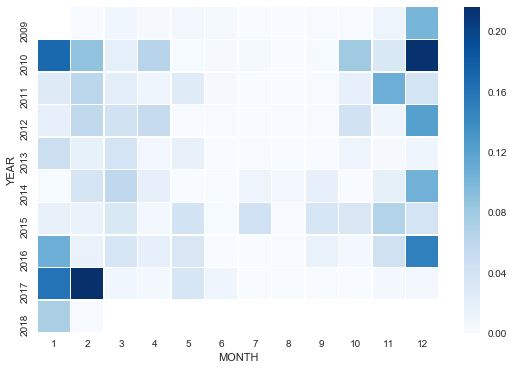

In [31]:
# Heatmap colored by precipitation
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(precip, annot=False, fmt='f', linewidths=.5, ax=ax, cmap='Blues')

Stack the monthly precipitation table using `stack()`. View the values for 2017. Which month had the most precipitation in 2017? Describe the distribution statistics for all months using `describe()`. How many months are included in this dataset? What was the median month (daily average) value in this time period?

In [32]:
# stack precipitation pivot table by year-month indexes
precip_stack = precip.stack()

In [33]:
# daily average for 2017, month by month
precip_stack[2017]

MONTH
1     0.160000
2     0.216429
3     0.008065
4     0.004667
5     0.036129
6     0.009667
7     0.000323
8     0.000968
9     0.000476
10    0.000000
11    0.005667
12    0.004516
dtype: float64

<span style='color:red'>February had the most precipitation of any month in 2017.</span>

In [34]:
# distribution statistics for mean daily averages by month
precip_stack.describe()

count    109.000000
mean       0.029280
std        0.044097
min        0.000000
25%        0.001613
50%        0.011290
75%        0.038065
max        0.216429
dtype: float64

<span style='color:red'>There are 109 months in this dataset. The median month (daily average) value was 0.011 inches of precipitation.</span>

Use `unstack()` to stack precipitation pivot table by month and then year. View the values for December. Which year had the wettest December?

In [35]:
# (un)stack precipitation pivot table by month-year indexes
precip_unstack = precip.unstack()

In [36]:
# daily average for December, year by year
precip_unstack[12]

YEAR
2009    0.101613
2010    0.214516
2011    0.039032
2012    0.121852
2013    0.010000
2014    0.105333
2015    0.038710
2016    0.150000
2017    0.004516
2018         NaN
dtype: float64

<span style='color:red'>The wettest December (by daily average) was in 2010.</span>

**Postscript:** Read more about [San Diego's odd 2010 weather](http://www.sandiegouniontribune.com/sdut-highlights-san-diegos-wild-and-weird-2010-weather-2011jan02-htmlstory.html).